# Statistical analysis about the iris dataset. 


In [ ]:
# Import necessary packages
import pandas as pd
import numpy as np 
import seaborn as sns
import scipy.stats as scs

# Read in cleaned dataset from "read_data.ipynb"
iris = pd.read_csv("../Data/iris_clean.csv")

iris.head()


In [183]:
# Looking at intresting data for the whole dataset
# You can easily see that the sepal is bigger than the petals in both directions. 
iris.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [184]:
# We'll look at the data but separated for the different classes/species.

species = iris["class"].unique()

for i in species:
    print(f"Specie: {i.capitalize()}")
    display(iris[iris['class'] == i].describe())



Specie: Setosa


,sepal_length,sepal_width,petal_length,petal_width
count,50.00000,50.000000,50.000000,50.00000
mean,5.00600,3.418000,1.464000,0.24400
std,0.35249,0.381024,0.173511,0.10721
min,4.30000,2.300000,1.000000,0.10000
25%,4.80000,3.125000,1.400000,0.20000
50%,5.00000,3.400000,1.500000,0.20000
75%,5.20000,3.675000,1.575000,0.30000
max,5.80000,4.400000,1.900000,0.60000


Specie: Versicolor


,sepal_length,sepal_width,petal_length,petal_width
count,50.000000,50.000000,50.000000,50.000000
mean,5.936000,2.770000,4.260000,1.326000
std,0.516171,0.313798,0.469911,0.197753
min,4.900000,2.000000,3.000000,1.000000
25%,5.600000,2.525000,4.000000,1.200000
50%,5.900000,2.800000,4.350000,1.300000
75%,6.300000,3.000000,4.600000,1.500000
max,7.000000,3.400000,5.100000,1.800000


Specie: Virginica


,sepal_length,sepal_width,petal_length,petal_width
count,50.00000,50.000000,50.000000,50.00000
mean,6.58800,2.974000,5.552000,2.02600
std,0.63588,0.322497,0.551895,0.27465
min,4.90000,2.200000,4.500000,1.40000
25%,6.22500,2.800000,5.100000,1.80000
50%,6.50000,3.000000,5.550000,2.00000
75%,6.90000,3.175000,5.875000,2.30000
max,7.90000,3.800000,6.900000,2.50000


In [185]:
iris.groupby(["class"]).mean()

,sepal_length,sepal_width,petal_length,petal_width
class,,,,
setosa,5.006,3.418,1.464,0.244
versicolor,5.936,2.770,4.260,1.326
virginica,6.588,2.974,5.552,2.026


Just by looking at some of the values above we can see that **Virgincia** seems to be the bigger among the species, and **Setosa** the smaller,  
in every category except the *sepal_width*.
We can also tell that the standard deviation for the **Setosa** is the smaller among the 3.  


#### Setting colors for following plots

In [186]:
# Setting the colors for the plots so they match throughout the analysis

display(sns.color_palette()) # Show standard colors
colors = sns.color_palette().as_hex() # Save the hex values to list


setosa_color = colors[0]
versicolor_color = colors[1]
virginica_color = colors[2]

width_color = colors[6]
length_color = colors[-1]



[(0.12156862745098039, 0.4666666666666667, 0.7058823529411765),
 (1.0, 0.4980392156862745, 0.054901960784313725),
 (0.17254901960784313, 0.6274509803921569, 0.17254901960784313),
 (0.8392156862745098, 0.15294117647058825, 0.1568627450980392),
 (0.5803921568627451, 0.403921568627451, 0.7411764705882353),
 (0.5490196078431373, 0.33725490196078434, 0.29411764705882354),
 (0.8901960784313725, 0.4666666666666667, 0.7607843137254902),
 (0.4980392156862745, 0.4980392156862745, 0.4980392156862745),
 (0.7372549019607844, 0.7411764705882353, 0.13333333333333333),
 (0.09019607843137255, 0.7450980392156863, 0.8117647058823529)]

## Exploring the Sepal measures
Making some plots regarding the sepal measures for the different classes  
The scatterplot is giving us a first glance at the distribution between the species where we can easily confirm  
that the setosa is the shortest amongst the species even though it is wider than it's competitors.

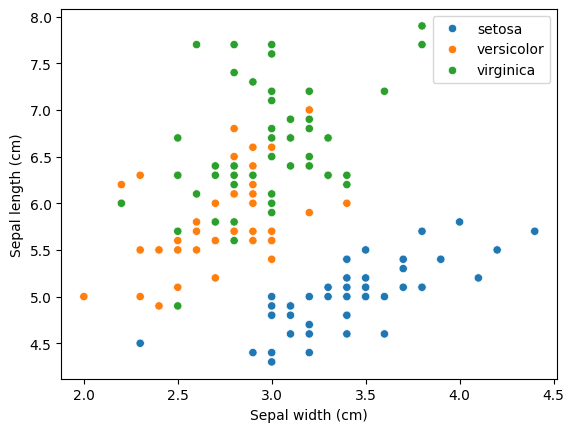

In [187]:
s_ax = sns.scatterplot(data=iris, 
                       y="sepal_length", x="sepal_width",
                       hue="class")
s_ax.set(ylabel="Sepal length (cm)", xlabel="Sepal width (cm)")

s_ax.legend().set_title("")



Drawing violinplots for the sepal measures to get an overview of the distribution,  
We can see that the **Setosa species** sepal lenght has less dispersion then the other two,  
especially the **Virginica** has a large variety of length.  

However, regarding the width, we can see that the Setosa is a little bit wider then the others,  
and common for Versicolor and Virginica seems to be that the length distribution is more separated then the width distribution. 


<Axes: title={'center': 'Sepal measures'}>

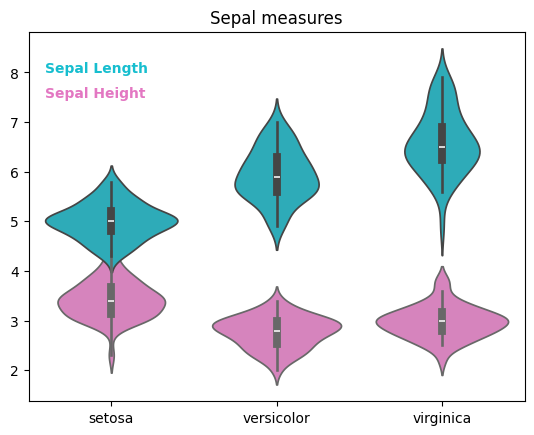

In [188]:
# Adding the width to plot
s_box = sns.violinplot(data=iris, 
                       x="class", y="sepal_width", 
                       color=width_color)

# Adding the length to plot 
s_box = sns.violinplot(data=iris, 
                       x="class", y="sepal_length", 
                       color=length_color) 


# Set labels
s_box.set(ylabel="",
          xlabel="",
          title="Sepal measures")

# Adding text to plot
s_box.text(-0.4, 8, "Sepal Length", color=length_color, fontweight="bold")
s_box.text(-0.4, 7.5, "Sepal Height", color=width_color, fontweight="bold")

s_box

## Exploring the Petal measures
Making plots for the petal measures as made for the sepal above.  

Here when we are viewing the Petal measures it is very clear that the Setosa is the smallest both regarding width and length.


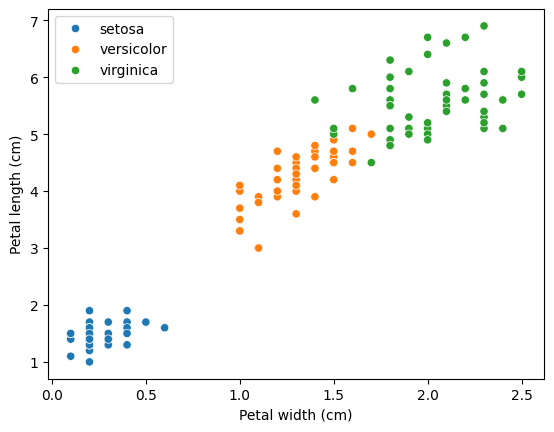

In [189]:
p_ax = sns.scatterplot(data=iris, 
                y="petal_length", x="petal_width", 
                hue="class")
p_ax.set(ylabel="Petal length (cm)", xlabel="Petal width (cm)")
p_ax.legend().set_title("")


With the violin plots for the petal measures we can once again see that the measures for the sutosa species  
has much less variety then the other two, the width for the sutosa is nearly the same for all 50 flowers in the dataset.  

We can confirm this by looking at the descriptive measures made earlier where the standard deviation for the  
petal width is close to ~0.1 for the *sutosa* while the *versicolor* is close to ~0.2 and the *virginica* even higher ~0.3.

In [190]:
# Standard deviation for the petal width thats discussed above
iris.groupby(["class"]).std().iloc[:,-1:]

,petal_width
class,
setosa,0.107210
versicolor,0.197753
virginica,0.274650


<Axes: title={'center': 'Petal measures'}>

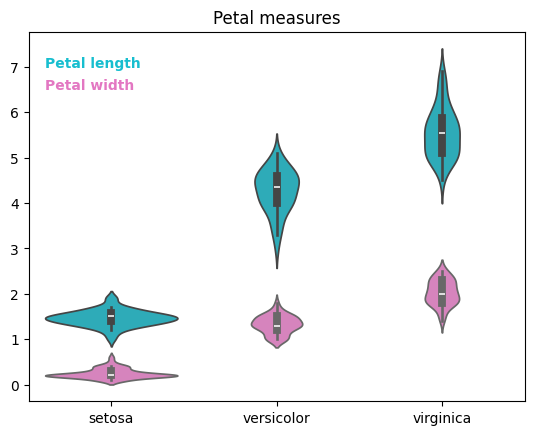

In [191]:
# Adding the width to plot
p_box = sns.violinplot(data=iris, 
                       x="class", y="petal_width", 
                       color=width_color)

# Adding the length to plot 
p_box = sns.violinplot(data=iris, 
                       x="class", y="petal_length", 
                       color=length_color) 


# Set labels
p_box.set(ylabel="",
          xlabel="",
          title="Petal measures")

# Adding text to plot
p_box.text(-0.4, 7, "Petal length", color=length_color, fontweight="bold")
p_box.text(-0.4, 6.5, "Petal width", color=width_color, fontweight="bold")

p_box

## Overview
Making a pairplot to view the complete dataset in a grapchical view to get some more impressions  
and easier overview of the dataset. We can easily see that the sutosa once again, stands out between the three. 


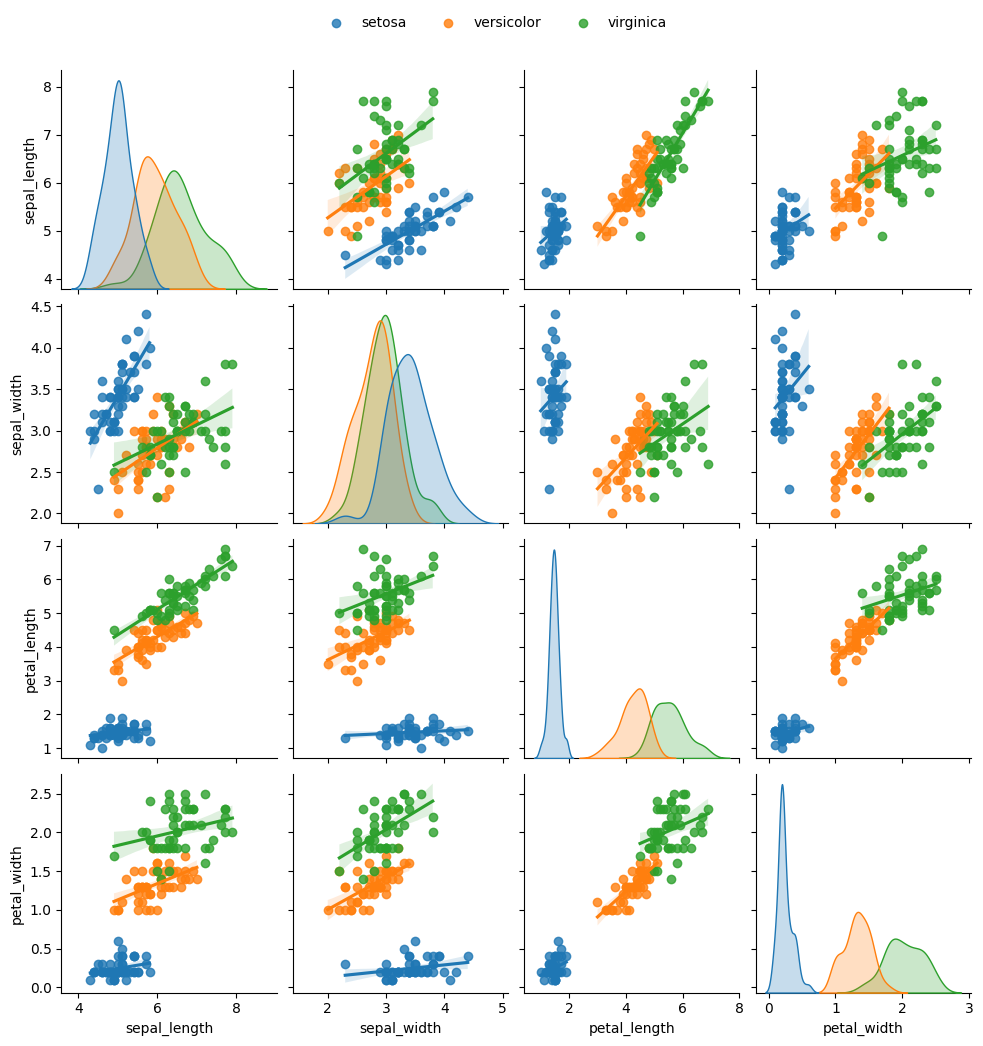

In [16]:
pr_ax = sns.pairplot(iris, hue="class", kind="reg")
sns.move_legend(pr_ax, "upper center", title = "", bbox_to_anchor = (0.45, 1.05), ncol = 3)

## Confidence interval
Creating a confidence interval regarding the mean of the petal length for every specie,  
to see if theere are any significant differences between the species.

In [17]:
# Importing the necessary packages from scipy, 
# we need to use t-stats because the std deviation for the population is unknown.
from scipy.stats import t


In [37]:
# Separating the dataset for the different species
setosa = iris[iris["class"] == "setosa"]
versicolor = iris[iris["class"] == "versicolor"]
viginica = iris[iris["class"] == "virginica"]


In [39]:
# We'll create a 95% confidence intervall for the petal lengths
confidence_level = 0.95
alpha = 1-0.95 # significant level
n = len(setosa["petal_length"]) # set n to sample size
mean = setosa["petal_length"].mean() # get mean of petal lenght
sem = scs.sem(setosa["petal_length"]) # getting the standard error for the interval() function

low, high = t.interval(confidence=confidence_level, df=n-1, loc=mean, scale=sem)

print(low, high)

1.4146886741595255 1.5133113258404745


In [40]:
# We'll create a 95% confidence intervall for the petal lengths
confidence_level = 0.95
alpha = 1-0.95 # significant level
n = len(versicolor["petal_length"]) # set n to sample size
mean = versicolor["petal_length"].mean() # get mean of petal lenght
sem = scs.sem(versicolor["petal_length"]) # getting the standard error for the interval() function

low, high = t.interval(confidence=confidence_level, df=n-1, loc=mean, scale=sem)

print(low, high)

4.126452778080923 4.393547221919077


In [41]:
# We'll create a 95% confidence intervall for the petal lengths
confidence_level = 0.95
alpha = 1-0.95 # significant level
n = len(viginica["petal_length"]) # set n to sample size
mean = viginica["petal_length"].mean() # get mean of petal lenght
sem = scs.sem(viginica["petal_length"]) # getting the standard error for the interval() function

low, high = t.interval(confidence=confidence_level, df=n-1, loc=mean, scale=sem)

print(low, high)

5.395153263133577 5.708846736866424
